In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
diamonds = pd.read_csv('diamonds_preprocessed.csv')
diamondsOG = pd.read_csv('diamonds_original.csv')

In [ ]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,class,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,"(5000, 10000]",0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,"[0, 5000]",0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,"[0, 5000]",0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,"(5000, 10000]",0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,"[0, 5000]",0.066582
...,...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,"[0, 5000]",0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,"[0, 5000]",0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,"[0, 5000]",0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,"[0, 5000]",0.080874


In [ ]:
diamondsOG

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.6,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.1,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.7,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.0,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.2,54.0,4.43,4.45,2.76,646.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.9,59.0,6.38,6.41,4.02,4796.0
53936,0.93,2,4,3,61.8,59.0,6.27,6.23,3.86,3750.0
53937,0.30,4,5,4,62.4,54.0,4.30,4.32,2.69,491.0
53938,0.36,3,2,4,61.5,55.0,4.60,4.57,2.82,807.0


In [ ]:
price_classes = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
feature_names = diamonds.columns.to_list()
feature_names.remove('class')
feature_names

['carat', 'clarity', 'color', 'cut', 'depth', 'table', 'x', 'y', 'z', 'volume']

In [ ]:
X = diamonds[feature_names]
y = diamonds['class']

In [ ]:
X

,carat,clarity,color,cut,depth,table,x,y,z,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,0.066582
...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,0.080874


In [ ]:
y

0        (5000, 10000]
1            [0, 5000]
2            [0, 5000]
3        (5000, 10000]
4            [0, 5000]
             ...      
52325        [0, 5000]
52326        [0, 5000]
52327        [0, 5000]
52328        [0, 5000]
52329        [0, 5000]
Name: class, Length: 52330, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
all_predictions = []
accuracy_scores = []

***

Pomocne funkcije za izvestaj o modelu

In [ ]:
def plot_learning_curve(pipeline, X_train, y_train):
  train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=3, random_state=42, train_sizes=np.linspace(0.1, 1.0, 10))

  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  plt.figure(figsize=(8, 6))
  plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Score')
  plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b')
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
  plt.xlabel('Training Set Size')
  plt.ylabel('Accuracy')
  plt.title('Learning Curve')
  plt.legend(loc='best')
  plt.grid(True)
  plt.show()

def model_report(pipeline, X_test, y_test):
  y_pred = pipeline.predict(X_test)
  model = pipeline['model']
  accuracy = accuracy_score(y_test, y_pred)
  all_predictions.append(y_pred)
  accuracy_scores.append(accuracy)

  print(f'Izvestaj o {type(model).__name__} modelu:')
  print('-------------------------------------------------------------------')
  print(f'Klase za predvidjanje: {price_classes}')
  print(f'Accuracy: {accuracy}')
  print('-------------------------------------------------------------------')
  print('Klasifikacioni izvestaj: ')
  print(classification_report(y_test, y_pred))
  print('-------------------------------------------------------------------')
  print('Matrica konfuzije: ')
  data = confusion_matrix(y_test, y_pred)
  _ = sns.heatmap(data, annot=True, fmt='g', xticklabels=model.classes_, yticklabels=model.classes_, cmap = plt.cm.Reds)



## MLPClassifier

In [ ]:
mlp = Pipeline([
    ('model', MLPClassifier(random_state=42, n_iter_no_change=10, tol=0.001 , verbose=False))
])

In [ ]:
mlp.fit(X_train, y_train)

Pipeline(steps=[('model', MLPClassifier(random_state=42, tol=0.001))])

Izvestaj o MLPClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9524810497483917
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.82      0.85      0.83      1018
 (5000, 10000]       0.88      0.91      0.90      2802
        15000+       0.84      0.77      0.80       409
     [0, 5000]       0.99      0.98      0.98     11470

      accuracy                           0.95     15699
     macro avg       0.88      0.88      0.88     15699
  weighted avg       0.95      0.95      0.95     15699

-------------------------------------------------------------------
Matrica konfuzije: 


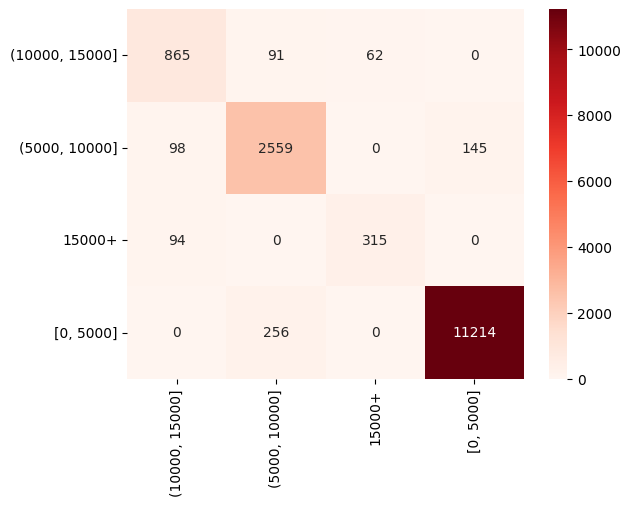

In [ ]:
model_report(mlp, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


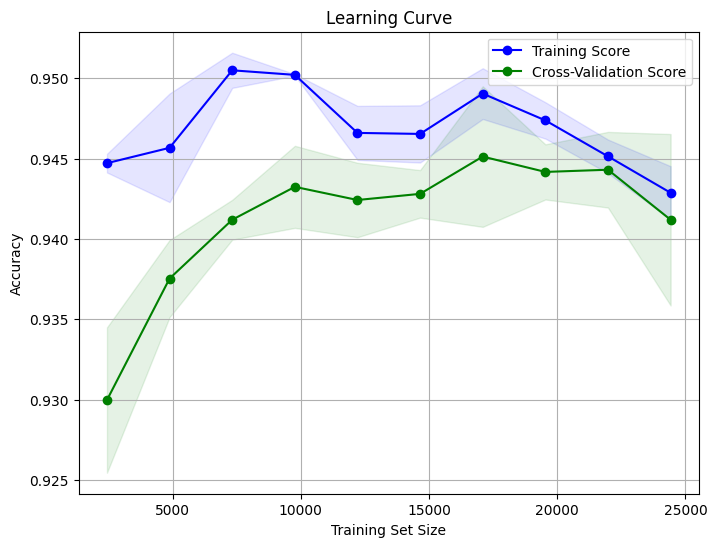

In [ ]:
plot_learning_curve(mlp, X_train, y_train)

#### Hyperparameter tuning

In [ ]:
params = {
    'model__hidden_layer_sizes' : [(80, 20), (50, 50), (50, 30, 20)],
    'model__activation' : ['relu', 'logistic', 'tanh'],
    'model__learning_rate' : ['adaptive', 'constant', 'invscaling']
}

In [ ]:
grid = GridSearchCV(mlp, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END model__activation=relu, model__hidden_layer_sizes=(80, 20), model__learning_rate=adaptive;, score=0.946 total time=   8.5s
[CV 2/3] END model__activation=relu, model__hidden_layer_sizes=(80, 20), model__learning_rate=adaptive;, score=0.950 total time=   7.4s
[CV 3/3] END model__activation=relu, model__hidden_layer_sizes=(80, 20), model__learning_rate=adaptive;, score=0.946 total time=  10.0s
[CV 1/3] END model__activation=relu, model__hidden_layer_sizes=(80, 20), model__learning_rate=constant;, score=0.946 total time=   8.4s
[CV 2/3] END model__activation=relu, model__hidden_layer_sizes=(80, 20), model__learning_rate=constant;, score=0.950 total time=   7.5s
[CV 3/3] END model__activation=relu, model__hidden_layer_sizes=(80, 20), model__learning_rate=constant;, score=0.946 total time=   9.9s
[CV 1/3] END model__activation=relu, model__hidden_layer_sizes=(80, 20), model__learning_rate=invscaling;, score=0.946 tota

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model',
                                        MLPClassifier(random_state=42,
                                                      tol=0.001))]),
             param_grid={'model__activation': ['relu', 'logistic', 'tanh'],
                         'model__hidden_layer_sizes': [(80, 20), (50, 50),
                                                       (50, 30, 20)],
                         'model__learning_rate': ['adaptive', 'constant',
                                                  'invscaling']},
             scoring='accuracy', verbose=4)

In [ ]:
grid.best_params_

{'model__activation': 'relu',
 'model__hidden_layer_sizes': (50, 30, 20),
 'model__learning_rate': 'adaptive'}

In [ ]:
mlp_cv = grid.best_estimator_

Izvestaj o MLPClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9499968150837633
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.81      0.81      0.81      1018
 (5000, 10000]       0.87      0.92      0.89      2802
        15000+       0.84      0.71      0.77       409
     [0, 5000]       0.99      0.98      0.98     11470

      accuracy                           0.95     15699
     macro avg       0.88      0.85      0.86     15699
  weighted avg       0.95      0.95      0.95     15699

-------------------------------------------------------------------
Matrica konfuzije: 


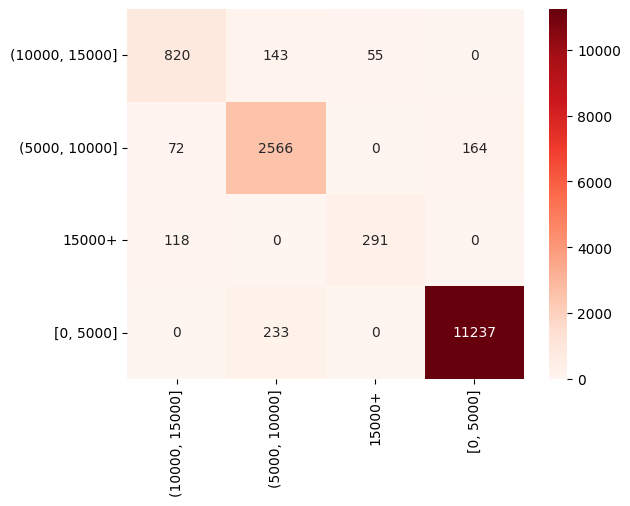

In [ ]:
model_report(mlp_cv, X_test, y_test)

Nema poboljsanja

In [ ]:
accuracy_scores.pop()

0.9499968150837633

In [ ]:
params = {
    'model__hidden_layer_sizes' : [(20, 50, 20), (100, 50)],
    'model__activation' : ['relu', 'logistic', 'tanh'],
    'model__learning_rate' : ['adaptive', 'constant', 'invscaling']
}

In [ ]:
grid = GridSearchCV(mlp, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END model__activation=relu, model__hidden_layer_sizes=(20, 50, 20), model__learning_rate=adaptive;, score=0.942 total time=   5.2s
[CV 2/3] END model__activation=relu, model__hidden_layer_sizes=(20, 50, 20), model__learning_rate=adaptive;, score=0.949 total time=   6.6s
[CV 3/3] END model__activation=relu, model__hidden_layer_sizes=(20, 50, 20), model__learning_rate=adaptive;, score=0.944 total time=   7.2s
[CV 1/3] END model__activation=relu, model__hidden_layer_sizes=(20, 50, 20), model__learning_rate=constant;, score=0.942 total time=   6.2s
[CV 2/3] END model__activation=relu, model__hidden_layer_sizes=(20, 50, 20), model__learning_rate=constant;, score=0.949 total time=   5.5s
[CV 3/3] END model__activation=relu, model__hidden_layer_sizes=(20, 50, 20), model__learning_rate=constant;, score=0.944 total time=   8.2s
[CV 1/3] END model__activation=relu, model__hidden_layer_sizes=(20, 50, 20), model__learning_rate=i

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model',
                                        MLPClassifier(random_state=42,
                                                      tol=0.001))]),
             param_grid={'model__activation': ['relu', 'logistic', 'tanh'],
                         'model__hidden_layer_sizes': [(20, 50, 20), (100, 50)],
                         'model__learning_rate': ['adaptive', 'constant',
                                                  'invscaling']},
             scoring='accuracy', verbose=4)

In [ ]:
grid.best_params_

{'model__activation': 'relu',
 'model__hidden_layer_sizes': (100, 50),
 'model__learning_rate': 'adaptive'}

In [ ]:
mlp_cv = grid.best_estimator_

Izvestaj o MLPClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9503153067074336
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.82      0.84      0.83      1018
 (5000, 10000]       0.91      0.86      0.89      2802
        15000+       0.80      0.81      0.81       409
     [0, 5000]       0.98      0.99      0.98     11470

      accuracy                           0.95     15699
     macro avg       0.88      0.87      0.88     15699
  weighted avg       0.95      0.95      0.95     15699

-------------------------------------------------------------------
Matrica konfuzije: 


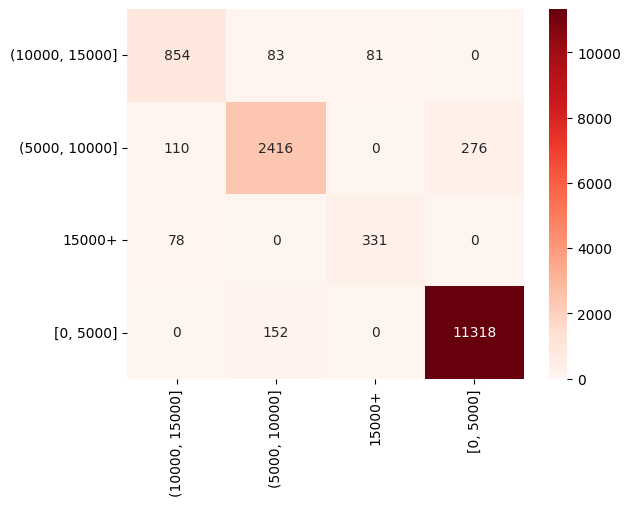

In [ ]:
model_report(mlp_cv, X_test, y_test)

Posto mreze sa manje cvorova od default ne daju bolje rezultate probacemo sa vecim

In [ ]:
accuracy_scores.pop()

0.9503153067074336

In [ ]:
params = {
    'model__hidden_layer_sizes' : [(100, 100), (200,), (200, 100)],
    'model__activation' : ['relu', 'logistic'],
    'model__learning_rate' : ['adaptive', 'constant', 'invscaling']
}

In [ ]:
grid = GridSearchCV(mlp, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END model__activation=relu, model__hidden_layer_sizes=(100, 100), model__learning_rate=adaptive;, score=0.948 total time=   9.9s
[CV 2/3] END model__activation=relu, model__hidden_layer_sizes=(100, 100), model__learning_rate=adaptive;, score=0.950 total time=  15.4s
[CV 3/3] END model__activation=relu, model__hidden_layer_sizes=(100, 100), model__learning_rate=adaptive;, score=0.945 total time=  12.7s
[CV 1/3] END model__activation=relu, model__hidden_layer_sizes=(100, 100), model__learning_rate=constant;, score=0.948 total time=   9.8s
[CV 2/3] END model__activation=relu, model__hidden_layer_sizes=(100, 100), model__learning_rate=constant;, score=0.950 total time=  14.6s
[CV 3/3] END model__activation=relu, model__hidden_layer_sizes=(100, 100), model__learning_rate=constant;, score=0.945 total time=  12.8s
[CV 1/3] END model__activation=relu, model__hidden_layer_sizes=(100, 100), model__learning_rate=invscaling;, sc

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model',
                                        MLPClassifier(random_state=42,
                                                      tol=0.001))]),
             param_grid={'model__activation': ['relu', 'logistic'],
                         'model__hidden_layer_sizes': [(100, 100), (200,),
                                                       (200, 100)],
                         'model__learning_rate': ['adaptive', 'constant',
                                                  'invscaling']},
             scoring='accuracy', verbose=4)

In [ ]:
grid.best_params_

{'model__activation': 'relu',
 'model__hidden_layer_sizes': (100, 100),
 'model__learning_rate': 'adaptive'}

In [ ]:
mlp_cv = grid.best_estimator_

Izvestaj o MLPClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9469392954965284
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.82      0.83      0.83      1018
 (5000, 10000]       0.92      0.83      0.87      2802
        15000+       0.82      0.77      0.80       409
     [0, 5000]       0.97      0.99      0.98     11470

      accuracy                           0.95     15699
     macro avg       0.88      0.86      0.87     15699
  weighted avg       0.95      0.95      0.95     15699

-------------------------------------------------------------------
Matrica konfuzije: 


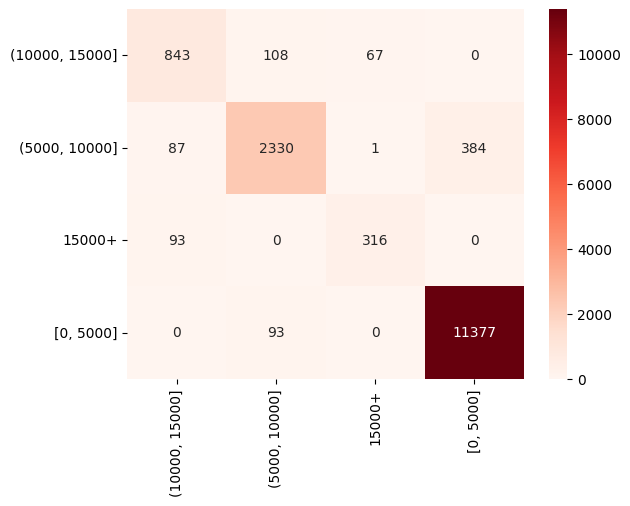

In [ ]:
model_report(mlp_cv, X_test, y_test)

I dalje bez poboljsanja, brisemo skor iz accuracy_scores

In [ ]:
accuracy_scores.pop()

0.9469392954965284

In [ ]:
params = {
    'model__hidden_layer_sizes' : [(100,), (100, 50), (100, 20)],
    'model__activation' : ['relu', 'logistic'],
    'model__learning_rate' : ['adaptive', 'constant', 'invscaling']
}

In [ ]:
grid = GridSearchCV(mlp, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END model__activation=relu, model__hidden_layer_sizes=(100,), model__learning_rate=adaptive;, score=0.943 total time=   6.0s
[CV 2/3] END model__activation=relu, model__hidden_layer_sizes=(100,), model__learning_rate=adaptive;, score=0.948 total time=   5.7s
[CV 3/3] END model__activation=relu, model__hidden_layer_sizes=(100,), model__learning_rate=adaptive;, score=0.943 total time=   5.4s
[CV 1/3] END model__activation=relu, model__hidden_layer_sizes=(100,), model__learning_rate=constant;, score=0.943 total time=   6.5s
[CV 2/3] END model__activation=relu, model__hidden_layer_sizes=(100,), model__learning_rate=constant;, score=0.948 total time=   5.1s
[CV 3/3] END model__activation=relu, model__hidden_layer_sizes=(100,), model__learning_rate=constant;, score=0.943 total time=   6.3s
[CV 1/3] END model__activation=relu, model__hidden_layer_sizes=(100,), model__learning_rate=invscaling;, score=0.943 total time=   5.6s

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model',
                                        MLPClassifier(random_state=42,
                                                      tol=0.001))]),
             param_grid={'model__activation': ['relu', 'logistic'],
                         'model__hidden_layer_sizes': [(100,), (100, 50),
                                                       (100, 20)],
                         'model__learning_rate': ['adaptive', 'constant',
                                                  'invscaling']},
             scoring='accuracy', verbose=4)

In [ ]:
grid.best_params_

{'model__activation': 'relu',
 'model__hidden_layer_sizes': (100, 20),
 'model__learning_rate': 'adaptive'}

In [ ]:
mlp_cv = grid.best_estimator_

Izvestaj o MLPClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9523536530989235
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.87      0.77      0.82      1018
 (5000, 10000]       0.87      0.93      0.90      2802
        15000+       0.75      0.90      0.82       409
     [0, 5000]       0.99      0.98      0.98     11470

      accuracy                           0.95     15699
     macro avg       0.87      0.89      0.88     15699
  weighted avg       0.95      0.95      0.95     15699

-------------------------------------------------------------------
Matrica konfuzije: 


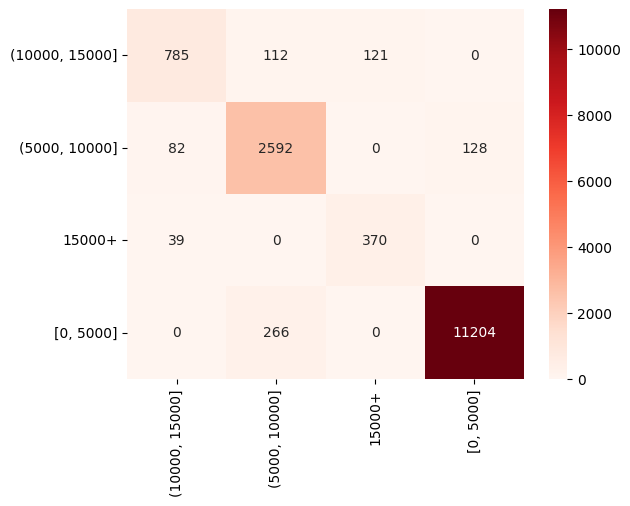

In [ ]:
model_report(mlp_cv, X_test, y_test)

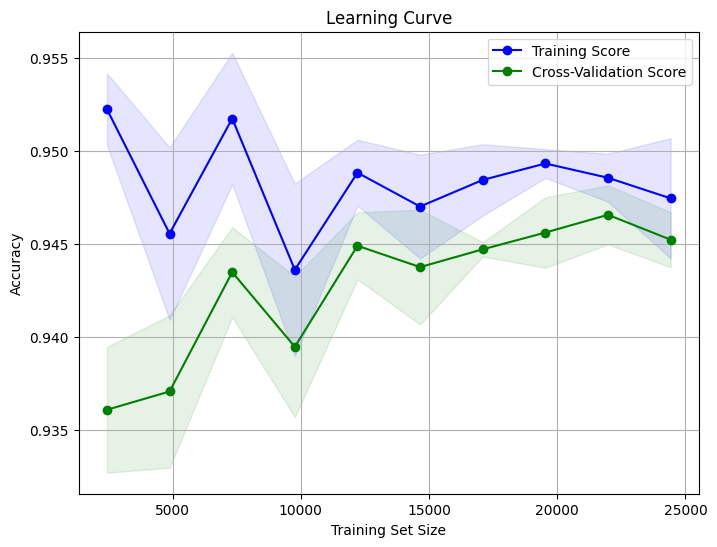

In [ ]:
plot_learning_curve(mlp_cv, X_train, y_train)

***

### Now with PCA

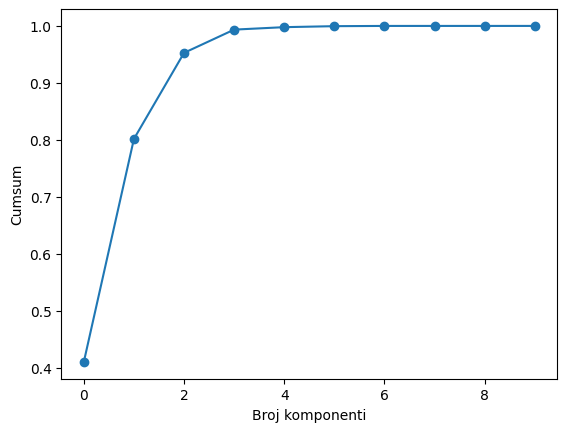

In [ ]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Broj komponenti')
plt.ylabel('Cumsum')
plt.show()

In [ ]:
mlp_pca = Pipeline([
    ('pca', PCA()),
    ('model', MLPClassifier(random_state=42, n_iter_no_change=10, tol=0.001 , verbose=False) )
])

In [ ]:
params = {
    'model__hidden_layer_sizes' : [(100,), (100, 20), (50, 50)],
    'model__activation' : ['relu', 'logistic'],
    'model__learning_rate' : ['adaptive', 'constant']
}

In [ ]:
grid = GridSearchCV(mlp_pca, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END model__activation=relu, model__hidden_layer_sizes=(100,), model__learning_rate=adaptive;, score=0.948 total time=   4.9s
[CV 2/3] END model__activation=relu, model__hidden_layer_sizes=(100,), model__learning_rate=adaptive;, score=0.952 total time=   3.6s
[CV 3/3] END model__activation=relu, model__hidden_layer_sizes=(100,), model__learning_rate=adaptive;, score=0.946 total time=   4.4s
[CV 1/3] END model__activation=relu, model__hidden_layer_sizes=(100,), model__learning_rate=constant;, score=0.948 total time=   4.8s
[CV 2/3] END model__activation=relu, model__hidden_layer_sizes=(100,), model__learning_rate=constant;, score=0.952 total time=   3.6s
[CV 3/3] END model__activation=relu, model__hidden_layer_sizes=(100,), model__learning_rate=constant;, score=0.946 total time=   4.5s
[CV 1/3] END model__activation=relu, model__hidden_layer_sizes=(100, 20), model__learning_rate=adaptive;, score=0.948 total time=   7.0

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model',
                                        MLPClassifier(random_state=42,
                                                      tol=0.001))]),
             param_grid={'model__activation': ['relu', 'logistic'],
                         'model__hidden_layer_sizes': [(100,), (100, 20),
                                                       (50, 50)],
                         'model__learning_rate': ['adaptive', 'constant']},
             scoring='accuracy', verbose=4)

In [ ]:
grid.best_params_

{'model__activation': 'relu',
 'model__hidden_layer_sizes': (100,),
 'model__learning_rate': 'adaptive'}

In [ ]:
mlp_pca_cv = grid.best_estimator_

Izvestaj o MLPClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9520988597999872
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.84      0.81      0.82      1018
 (5000, 10000]       0.88      0.91      0.90      2802
        15000+       0.82      0.80      0.81       409
     [0, 5000]       0.98      0.98      0.98     11470

      accuracy                           0.95     15699
     macro avg       0.88      0.87      0.88     15699
  weighted avg       0.95      0.95      0.95     15699

-------------------------------------------------------------------
Matrica konfuzije: 


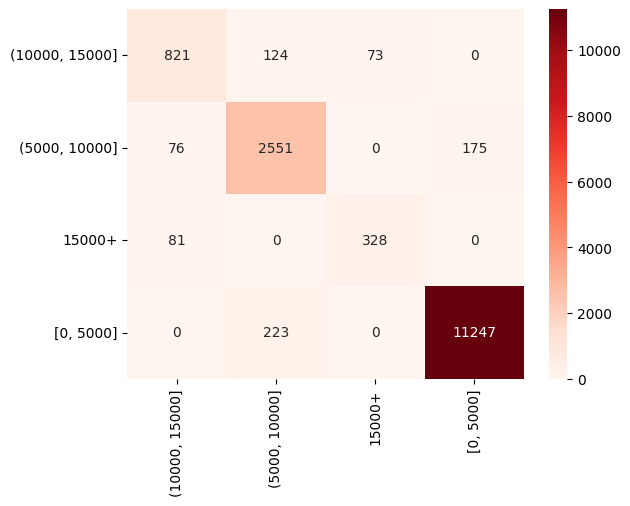

In [ ]:
model_report(mlp_pca_cv, X_test, y_test)

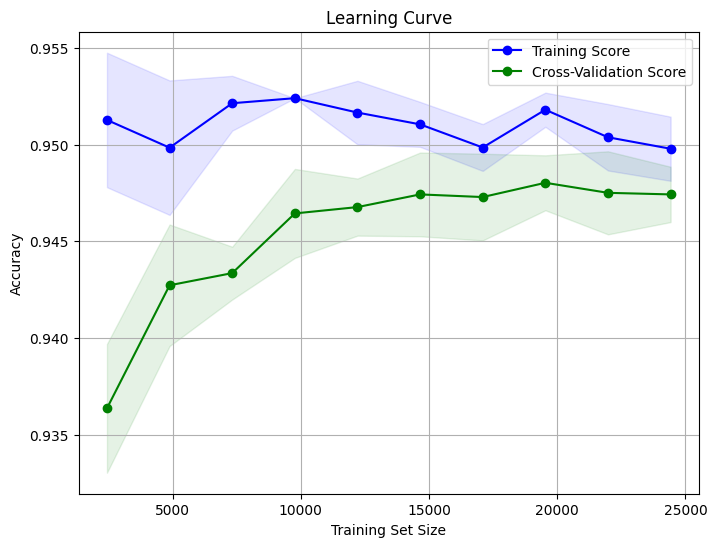

In [ ]:
plot_learning_curve(mlp_pca_cv, X_train, y_train)

***

## Results:

In [ ]:
model_names = ['mlp', 'mlp_cv', 'mlp_pca_cv']

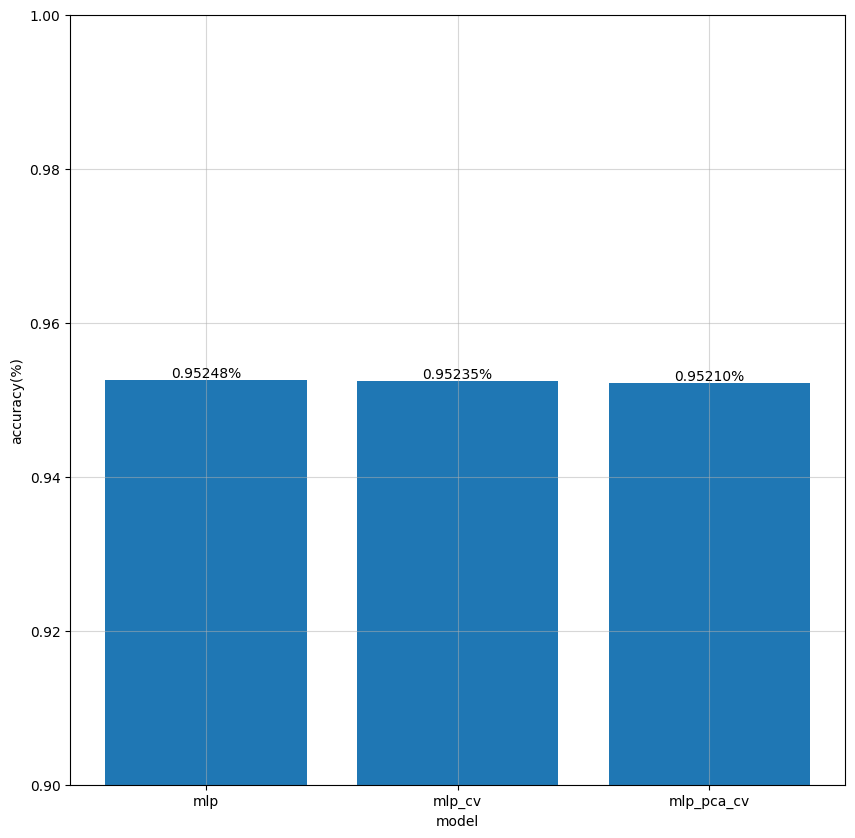

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(model_names, accuracy_scores)
plt.grid(alpha=0.5)
plt.ylim(0.9, 1.0)
for i, s in enumerate(accuracy_scores):
    plt.text(model_names[i], s, f'{s:.5f}%', ha='center', va='bottom')
plt.xlabel('model')
plt.ylabel('accuracy(%)')
plt.show()

S obzirom na rezultate, izabracemo **mlp** kao predstavnika **MLPClassifier**

In [ ]:
joblib.dump(mlp, 'MLP.pkl')

['MLP.pkl']